# Setup

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
data = pd.read_csv('..\Data\homes.csv')

In [123]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data exploration

In [124]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

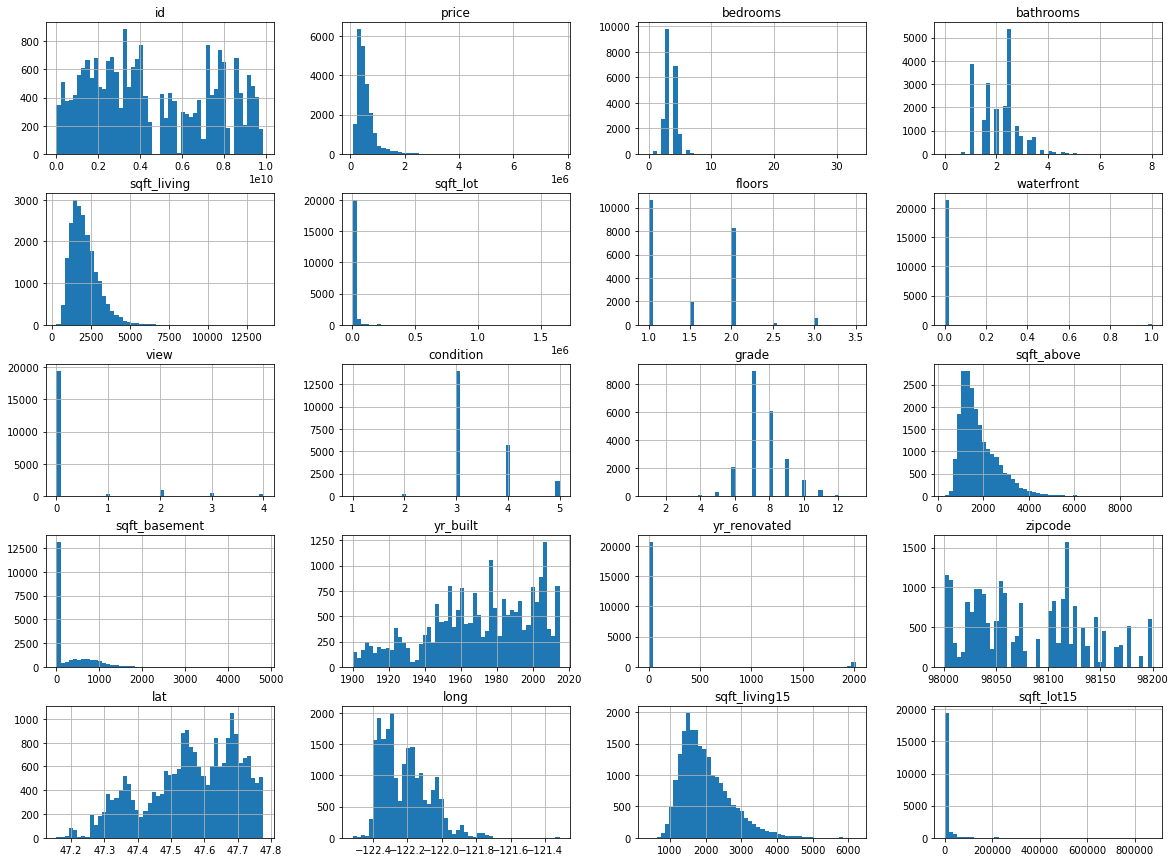

In [125]:
data.hist(bins=50, figsize=(20,15))
plt.show()

# Clean data

In [126]:
def date_to_year(date):
    years = []
    for d in date:
        years.append(int(d[:4]))
    return pd.DataFrame({'year': years})

homes = pd.concat([data.drop(['date'], axis=1), date_to_year(data.date)], axis=1)

In [127]:
def refactor_grades(grades, index):
  grades_new = []
  for grade in grades:
      if(grade in [1,2,3]):
        grades_new.append(0)
      elif(grade in [4,5,6]):
        grades_new.append(1)
      elif(grade in [7]):
        grades_new.append(2)
      elif(grade in [8,9,10]):
        grades_new.append(3)
      else :
        grades_new.append(4)
  return pd.DataFrame({'grade': grades_new}, index=index)

homes = pd.concat([homes.drop(['grade'], axis=1), refactor_grades(homes.grade, homes.index)], axis=1)

In [128]:
homes.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,grade
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,2
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,2
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,1
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,2
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,3


# See correlation

In [129]:
homes.corr().price.sort_values()

zipcode         -0.053203
id              -0.016762
year             0.003576
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
grade            0.524324
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Split data 

In [130]:
from sklearn.model_selection import train_test_split

y = homes['price']
X = homes.drop(['price'], axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear Regression

In [131]:
def display_scores(scores):
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    return scores.mean(), scores.std()

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train,y_train)
y_predicted = lr.predict(X_test)

mean_absolute_error(y_test, y_predicted)

133399.54724302844

In [133]:
from sklearn.model_selection import cross_val_score

y_scores = cross_val_score(lr, X_train, y_train, cv=5)

display_scores(y_scores)

Mean: 0.6771035600450694
Standard deviation: 0.014504508836363181


(0.6771035600450694, 0.014504508836363181)

# DecisionTreeRegressor

In [134]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)
y_predicted = dt.predict(X_test)

mean_absolute_error(y_test, y_predicted)

103741.00693962527

In [135]:
y_scores = cross_val_score(dt, X_train, y_train, cv=5)

display_scores(y_scores)

Mean: 0.7348663149317967
Standard deviation: 0.0141142744990433


(0.7348663149317967, 0.0141142744990433)

# RandomForestRegressor

In [136]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
rf.fit(X_train,y_train)
y_predicted = rf.predict(X_test)

mean_absolute_error(y_test, y_predicted)

71331.87686593304

In [137]:
y_scores = cross_val_score(dt, X_train, y_train, cv=5)

display_scores(y_scores)

Mean: 0.7348663149317967
Standard deviation: 0.0141142744990433


(0.7348663149317967, 0.0141142744990433)

# Random search

LinearRegression

In [138]:
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(positive=[False, True], fit_intercept=[True, False])

rscv_lr = RandomizedSearchCV(lr, distributions, random_state=0)

search_lr = rscv_lr.fit(X_train, y_train)
search_lr.best_params_

c:\Users\cdeva\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'positive': False, 'fit_intercept': True}

In [119]:
lr = LinearRegression(positive=False, fit_intercept=True)
lr.fit(X_train,y_train)
y_predicted = lr.predict(X_test)

mean_absolute_error(y_test, y_predicted)

131475.35432633574

In [120]:
lr_mean, lr_std = display_scores(cross_val_score(lr, X_train, y_train, cv=5))

Mean: 0.6719562770606984
Standard deviation: 0.009794408928535763


DecisionTreeRegressor

In [145]:
distributions = dict(
    criterion=['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    max_depth=[550, 600, 650, 700, 750, 800]
)

rscv_dt = RandomizedSearchCV(dt, distributions, random_state=0)

search_dt = rscv_dt.fit(X_train, y_train)
search_dt.best_params_

{'max_depth': 800, 'criterion': 'friedman_mse'}

In [147]:
dt = DecisionTreeRegressor(max_depth=800, criterion='friedman_mse')
dt.fit(X_train,y_train)
y_predicted = dt.predict(X_test)

mean_absolute_error(y_test, y_predicted)

105437.77908859588

In [155]:
dt_mean, dt_std = display_scores(cross_val_score(dt, X_train, y_train, cv=5))

Mean: 0.7329904451007405
Standard deviation: 0.014183966851694948


RandomForestRegressor

In [150]:
distributions = dict(
    n_estimators=[50, 100, 200, 400, 550, 700],
    criterion=['squared_error', 'absolute_error', 'poisson'],
    max_depth=[3, 7, 11, 14, 16, None], 

)

rscv_rf = RandomizedSearchCV(rf, distributions, random_state=0)

search_rf = rscv_rf.fit(X_train, y_train)
search_rf.best_params_

{'n_estimators': 700, 'max_depth': None, 'criterion': 'poisson'}

In [151]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0, n_jobs=-1, n_estimators=700, criterion='poisson')
rf.fit(X_train,y_train)
y_predicted = rf.predict(X_test)

mean_absolute_error(y_test, y_predicted)

71090.05737204575

In [153]:
rf_mean, rf_std = display_scores(cross_val_score(rf, X_train, y_train, cv=5))

Mean: 0.8718376034351898
Standard deviation: 0.003990884968011952


# Results

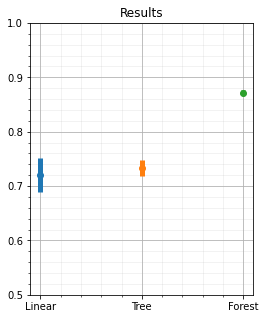

In [159]:
models = ['Linear', 'Tree', 'Forest']
mean = [lr_mean, dt_mean, rf_mean]
std = [lr_std, dt_std, rf_std]

plt.figure(figsize=(4,5))
for i in range(3):
    plt.errorbar(i, mean[i], xerr=0, yerr=std[i], fmt='o', linewidth=5)
plt.xticks([0,1,2], models)
plt.title('Results')
plt.ylim(0.5, 1)
plt.grid(b=True, which='major', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', alpha=0.2, linestyle='-')
plt.show()